In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import json
from numpy import array as ay
%matplotlib inline

### Timing

In [2]:
db = json.load(open("./nosetests.json"))

In [3]:
results = db['results']

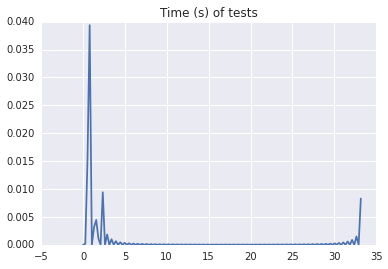

In [4]:
sb.kdeplot(ay([result['time'] for result in results]))
plt.title('Time (s) of tests');

In [5]:
submods = {}
for result in results:
    cname = result['classname']
    try:
        submod = cname.split(':')[0].split('.')[1]
        if "NameSpace" in submod:
            submod = u"core"
    except:
        if "twosls" in cname or 'ols' in cname or 'ml' in cname:
            submod = u'spreg'
        elif 'shapefile' in cname:
            submod = u'core'
    if submod not in submods:
        submods.update({submod:[]})
    submods[submod].append(result['time'])
    result['submodule'] = submod

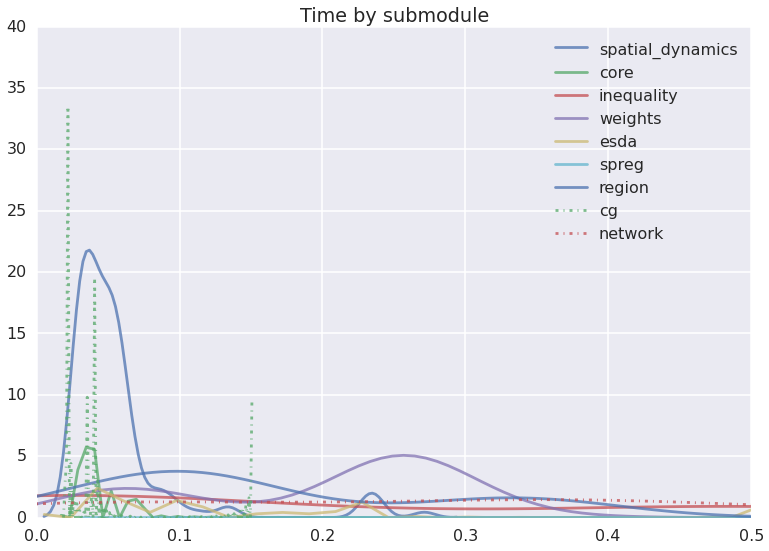

In [7]:
sb.set_context("poster")
for i,(k,v) in enumerate(submods.items()):
    if k == 'examples':
        continue
    if i > 6:
        style = '-.'
    else:
        style = '-'
    sb.kdeplot(ay(v), label=k, alpha=.75, linestyle=style)
plt.legend()
plt.axis([0,.5,0,40])
plt.title("Time by submodule")